<a href="https://colab.research.google.com/github/qli111/QSAR-COVID-19/blob/main/virtual_Screening_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 34.1 MB/s eta 0:00:00


In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import rdmolops

In [4]:
import seaborn as sns

In [5]:
active_df = pd.read_csv("/content/mk01/actives_final.ism",header=None,sep=" ")
active_rows,active_cols = active_df.shape
active_df.columns = ["SMILES","ID","ChEMBL_ID"]
active_df["label"] = ["Active"]*active_rows
PandasTools.AddMoleculeColumnToFrame(active_df,"SMILES","Mol")

In [6]:
def add_property_columns_to_df(df_in):
    df_in["mw"] = [Descriptors.MolWt(mol) for mol in df_in.Mol]
    df_in["logP"] = [Descriptors.MolLogP(mol) for mol in df_in.Mol]
    df_in["charge"] = [rdmolops.GetFormalCharge(mol) for mol in df_in.Mol]

In [7]:
add_property_columns_to_df(active_df)

In [8]:
active_df.head()

,SMILES,ID,ChEMBL_ID,label,Mol,mw,logP,charge
0,Cn1ccnc1Sc2ccc(cc2Cl)Nc3c4cc(c(cc4ncc3C#N)OCCC...,168691,CHEMBL318804,Active,<rdkit.Chem.rdchem.Mol object at 0x7f05900a9200>,565.099,5.49788,0
1,C[C@@]12[C@@H]([C@@H](CC(O1)n3c4ccccc4c5c3c6n2...,86358,CHEMBL162,Active,<rdkit.Chem.rdchem.Mol object at 0x7f05900a9270>,466.541,4.35400,0
2,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575087,CHEMBL576683,Active,<rdkit.Chem.rdchem.Mol object at 0x7f05900a92e0>,527.915,4.96202,0
3,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575065,CHEMBL571484,Active,<rdkit.Chem.rdchem.Mol object at 0x7f05900a9350>,491.935,4.36922,0
4,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575047,CHEMBL568937,Active,<rdkit.Chem.rdchem.Mol object at 0x7f05900a93c0>,487.991,5.12922,0


In [9]:
decoy_df = pd.read_csv("/content/mk01/decoys_final.ism",header=None,sep=" ")
decoy_df.columns = ["SMILES","ID"]
decoy_rows, decoy_cols = decoy_df.shape
decoy_df["label"] = ["Decoy"]*decoy_rows
PandasTools.AddMoleculeColumnToFrame(decoy_df,"SMILES","Mol")
add_property_columns_to_df(decoy_df)

In [10]:
decoy_df.head()

,SMILES,ID,label,Mol,mw,logP,charge
0,C1COCCNC(=S)NCCOCCNC(=S)N1,C03897368,Decoy,<rdkit.Chem.rdchem.Mol object at 0x7f058ffb8200>,292.430,-1.03860,0
1,c1cc(ccc1[C@H]2c3ccc(cc3OC(=C2C#N)N)N)O,C00242247,Decoy,<rdkit.Chem.rdchem.Mol object at 0x7f058ffb8270>,279.299,2.19258,0
2,C[C@]12CC[C@H](C[C@@H]1CC[C@@H]3[C@@H]2C(=O)C[...,C04096778,Decoy,<rdkit.Chem.rdchem.Mol object at 0x7f058ffb82e0>,366.498,1.65330,0
3,Cc1ccc2c(c1)cc(c(=O)[nH]2)[C@@H]3c4c(n[nH]c4OC...,C00421469,Decoy,<rdkit.Chem.rdchem.Mol object at 0x7f058ffb8350>,333.351,2.08622,0
4,Cc1cc2cc(c(=O)[nH]c2cc1C)[C@@H]3c4c(n[nH]c4OC(...,C00421479,Decoy,<rdkit.Chem.rdchem.Mol object at 0x7f058ffb83c0>,347.378,2.39464,0


In [11]:
tmp_df = active_df.append(decoy_df)

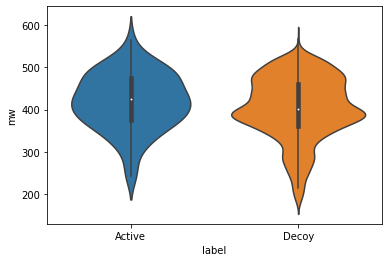

In [12]:
sns.violinplot(x=tmp_df["label"],y=tmp_df["mw"]);

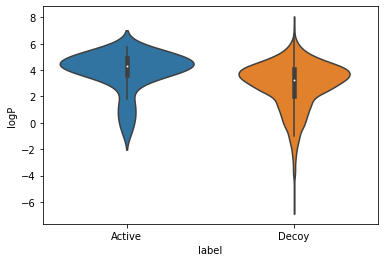

In [13]:
sns.violinplot(x=tmp_df["label"],y=tmp_df["logP"]);

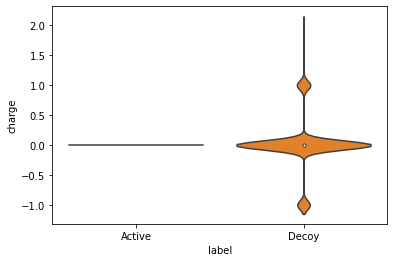

In [14]:
sns.violinplot(x=tmp_df["label"],y=tmp_df["charge"]);

In [15]:
charged = decoy_df[decoy_df["charge"] != 0]

In [16]:
charged.shape[0]/decoy_df.shape[0]

0.16175824175824177

In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [25]:
def neutralize_atoms(mol):
    pattern = Chem.MolFromSmarts("[+1!h0!$([*]~[-1,-2,-3,-4]),-1!$([*]~[+1,+2,+3,+4])]")
    at_matches = mol.GetSubstructMatches(pattern)
    at_matches_list = [y[0] for y in at_matches]
    if len(at_matches_list) > 0:
        for at_idx in at_matches_list:
            atom = mol.GetAtomWithIdx(at_idx)
            chg = atom.GetFormalCharge()
            hcount = atom.GetTotalNumHs()
            atom.SetFormalCharge(0)
            atom.SetNumExplicitHs(hcount - chg)
            atom.UpdatePropertyCache()
    return mol

In [26]:
revised_decoy_df = decoy_df[["SMILES","ID","label"]].copy()

In [56]:
from rdkit import Chem
from rdkit.Chem import AllChem
def _InitialiseNeutralisationReactions():
  patts=(
      ('[n+;H]','n'),
      ('[N+;!H0]','N'),
      ('[S-;X1]','S'),
      ('[$([N-;X2]S(=O)=O)]','N'),
      ('[$([N-;X2][C,N]=C)]','N'),
      ('[n-]','[nH]'),
      ('[$([S-]=O)]','S'),
      ('[$([N-]C=O)]','N'),
      ('[$([O-]);!$([O-][#7])]','O'),                      
  )
  return [(Chem.MolFromSmarts(x),Chem.MolFromSmiles(y,False)) for x,y in patts]

In [66]:
_reactions=None
def NeutraliseCharges(x, reactions=None):
    global _reactions
    if reactions is None:
        if _reactions is None:
            _reactions=_InitialiseNeutralisationReactions()
        reactions=_reactions
    mol = Chem.MolFromSmiles(x)
    replaced = False
    for i,(reactant, product) in enumerate(reactions):
        while mol.HasSubstructMatch(reactant):
            replaced = True
            rms = AllChem.ReplaceSubstructs(mol, reactant, product)
            mol = rms[0]
    if replaced:
        return (Chem.MolToSmiles(mol,True), True)
    else:
        return (x, False)

In [58]:
revised_decoy_df = decoy_df[["SMILES","ID","label"]].copy()

In [48]:
revised_decoy_df


,SMILES,ID,label
0,C1COCCNC(=S)NCCOCCNC(=S)N1,C03897368,Decoy
1,c1cc(ccc1[C@H]2c3ccc(cc3OC(=C2C#N)N)N)O,C00242247,Decoy
2,C[C@]12CC[C@H](C[C@@H]1CC[C@@H]3[C@@H]2C(=O)C[...,C04096778,Decoy
3,Cc1ccc2c(c1)cc(c(=O)[nH]2)[C@@H]3c4c(n[nH]c4OC...,C00421469,Decoy
4,Cc1cc2cc(c(=O)[nH]c2cc1C)[C@@H]3c4c(n[nH]c4OC(...,C00421479,Decoy
...,...,...,...
4545,CCOc1ccc(cc1[N+](=O)[O-])C(=O)OCCSc2cc(c(c(c2)...,C57324840,Decoy
4546,Cc1cc(cc(c1NC(=O)c2ccccc2)C)SCCOC(=O)c3cc(ccc3...,C57324854,Decoy
4547,CCc1ccc(cc1)O[C@@H](C)c2nnc(n2C)SCC(=O)Nc3c(c4...,C13871253,Decoy
4548,C=CCSc1ccccc1NC(=O)CSc2nnc(n2c3ccccc3)c4ccc(cc...,C59791396,Decoy


In [49]:
revised_decoy_df["SMILES"] 

0                              C1COCCNC(=S)NCCOCCNC(=S)N1
1                 c1cc(ccc1[C@H]2c3ccc(cc3OC(=C2C#N)N)N)O
2       C[C@]12CC[C@H](C[C@@H]1CC[C@@H]3[C@@H]2C(=O)C[...
3       Cc1ccc2c(c1)cc(c(=O)[nH]2)[C@@H]3c4c(n[nH]c4OC...
4       Cc1cc2cc(c(=O)[nH]c2cc1C)[C@@H]3c4c(n[nH]c4OC(...
                              ...                        
4545    CCOc1ccc(cc1[N+](=O)[O-])C(=O)OCCSc2cc(c(c(c2)...
4546    Cc1cc(cc(c1NC(=O)c2ccccc2)C)SCCOC(=O)c3cc(ccc3...
4547    CCc1ccc(cc1)O[C@@H](C)c2nnc(n2C)SCC(=O)Nc3c(c4...
4548    C=CCSc1ccccc1NC(=O)CSc2nnc(n2c3ccccc3)c4ccc(cc...
4549    CCc1cccc(c1)NC(=O)CSc2nc3c(nn(c3c(=O)n2Cc4cccc...
Name: SMILES, Length: 4550, dtype: object

In [67]:
revised_decoy_df["SMILES"] = [NeutraliseCharges(x)[0] for x in revised_decoy_df["SMILES"]]

In [68]:
revised_decoy_df["SMILES"]

0                              C1COCCNC(=S)NCCOCCNC(=S)N1
1                 c1cc(ccc1[C@H]2c3ccc(cc3OC(=C2C#N)N)N)O
2       C[C@]12CC[C@H](C[C@@H]1CC[C@@H]3[C@@H]2C(=O)C[...
3       Cc1ccc2c(c1)cc(c(=O)[nH]2)[C@@H]3c4c(n[nH]c4OC...
4       Cc1cc2cc(c(=O)[nH]c2cc1C)[C@@H]3c4c(n[nH]c4OC(...
                              ...                        
4545    CCOc1ccc(cc1[N+](=O)[O-])C(=O)OCCSc2cc(c(c(c2)...
4546    Cc1cc(cc(c1NC(=O)c2ccccc2)C)SCCOC(=O)c3cc(ccc3...
4547    CCc1ccc(cc1)O[C@@H](C)c2nnc(n2C)SCC(=O)Nc3c(c4...
4548    C=CCSc1ccccc1NC(=O)CSc2nnc(n2c3ccccc3)c4ccc(cc...
4549    CCc1cccc(c1)NC(=O)CSc2nc3c(nn(c3c(=O)n2Cc4cccc...
Name: SMILES, Length: 4550, dtype: object

In [69]:
PandasTools.AddMoleculeColumnToFrame(revised_decoy_df,"SMILES","Mol")
add_property_columns_to_df(revised_decoy_df)

,SMILES,ID,label,Mol,mw,logP,charge
0,C1COCCNC(=S)NCCOCCNC(=S)N1,C03897368,Decoy,,292.430,-1.03860,0
1,c1cc(ccc1[C@H]2c3ccc(cc3OC(=C2C#N)N)N)O,C00242247,Decoy,,279.299,2.19258,0
2,C[C@]12CC[C@H](C[C@@H]1CC[C@@H]3[C@@H]2C(=O)C[...,C04096778,Decoy,,366.498,1.65330,0
3,Cc1ccc2c(c1)cc(c(=O)[nH]2)[C@@H]3c4c(n[nH]c4OC...,C00421469,Decoy,,333.351,2.08622,0
4,Cc1cc2cc(c(=O)[nH]c2cc1C)[C@@H]3c4c(n[nH]c4OC(...,C00421479,Decoy,,347.378,2.39464,0
...,...,...,...,...,...,...,...
4545,CCOc1ccc(cc1[N+](=O)[O-])C(=O)OCCSc2cc(c(c(c2)...,C57324840,Decoy,,494.569,5.81174,0
4546,Cc1cc(cc(c1NC(=O)c2ccccc2)C)SCCOC(=O)c3cc(ccc3...,C57324854,Decoy,,519.623,6.01324,0
4547,CCc1ccc(cc1)O[C@@H](C)c2nnc(n2C)SCC(=O)Nc3c(c4...,C13871253,Decoy,,528.700,5.36530,0
4548,C=CCSc1ccccc1NC(=O)CSc2nnc(n2c3ccccc3)c4ccc(cc...,C59791396,Decoy,,503.609,5.85140,0

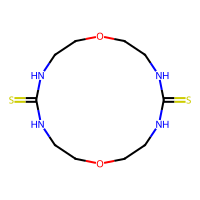
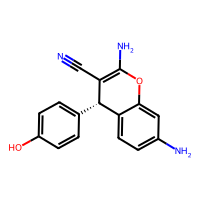
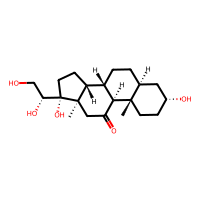
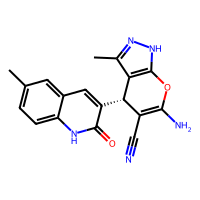
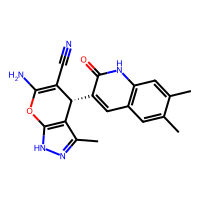
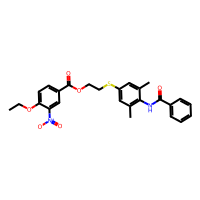
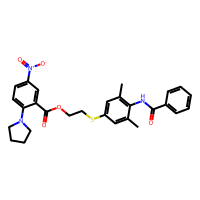
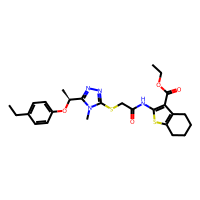
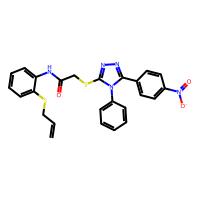
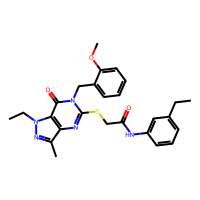

In [70]:
revised_decoy_df

In [71]:
new_tmp_df = active_df.append(revised_decoy_df)

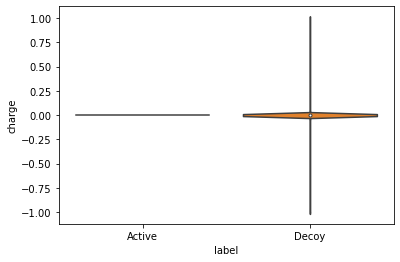

In [72]:
sns.violinplot(x=new_tmp_df["label"],y=new_tmp_df["charge"])

In [73]:
charged = revised_decoy_df[revised_decoy_df["charge"] != 0]
charged.shape[0]/revised_decoy_df.shape[0]

0.0026373626373626374

In [74]:
active_df["is_active"] = [1] * active_df.shape[0]
revised_decoy_df["is_active"] = [0] * revised_decoy_df.shape[0]
combined_df = active_df.append(revised_decoy_df)[["SMILES","ID","is_active"]]
combined_df.head()

,SMILES,ID,is_active
0,Cn1ccnc1Sc2ccc(cc2Cl)Nc3c4cc(c(cc4ncc3C#N)OCCC...,168691,1
1,C[C@@]12[C@@H]([C@@H](CC(O1)n3c4ccccc4c5c3c6n2...,86358,1
2,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575087,1
3,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575065,1
4,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575047,1


In [75]:
combined_df.to_csv("dude_erk1_mk01.csv")